In [1]:
# 1. Importing the dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRFClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

In [2]:
# 2. Data Loading and Understanding
# load the csv data to a pandas dataframe

In [3]:
df = pd.read_csv("customer_churn_dataset.csv")

In [4]:
df.shape

(5000, 12)

In [5]:
df.head(10)

,Customer ID,Age,Gender,Contract Type,Tenure,Monthly Charges,Total Charges,Tech Support,Internet Service,Paperless Billing,Payment Method,Churn
0,CUST00001,56,Female,One Year,45,127.93,5379.40,Yes,Fiber Optic,Yes,Mailed Check,No
1,CUST00002,69,Female,Month-to-Month,55,25.05,1284.65,Yes,Fiber Optic,No,Electronic Check,No
2,CUST00003,46,Female,Two Years,59,104.50,6223.68,No,Fiber Optic,Yes,Bank Transfer,No
3,CUST00004,32,Female,One Year,5,142.65,735.99,Yes,DSL,No,Electronic Check,No
4,CUST00005,60,Female,Month-to-Month,32,120.97,4228.65,No,Fiber Optic,Yes,Mailed Check,No
5,CUST00006,25,Male,One Year,6,95.23,562.46,No,DSL,No,Mailed Check,Yes
6,CUST00007,78,Male,Two Years,26,52.45,1435.96,No,DSL,Yes,Mailed Check,No
7,CUST00008,38,Female,Month-to-Month,37,68.84,2351.73,Yes,DSL,Yes,Credit Card,No
8,CUST00009,56,Male,Month-to-Month,13,143.12,2005.54,No,NaN,Yes,Bank Transfer,No
9,CUST00010,75,Female,Two Years,69,52.60,3726.02,No,DSL,Yes,Bank Transfer,No


In [6]:
pd.set_option("display.max_columns",None)

In [7]:
df.head(5)

,Customer ID,Age,Gender,Contract Type,Tenure,Monthly Charges,Total Charges,Tech Support,Internet Service,Paperless Billing,Payment Method,Churn
0,CUST00001,56,Female,One Year,45,127.93,5379.40,Yes,Fiber Optic,Yes,Mailed Check,No
1,CUST00002,69,Female,Month-to-Month,55,25.05,1284.65,Yes,Fiber Optic,No,Electronic Check,No
2,CUST00003,46,Female,Two Years,59,104.50,6223.68,No,Fiber Optic,Yes,Bank Transfer,No
3,CUST00004,32,Female,One Year,5,142.65,735.99,Yes,DSL,No,Electronic Check,No
4,CUST00005,60,Female,Month-to-Month,32,120.97,4228.65,No,Fiber Optic,Yes,Mailed Check,No


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        5000 non-null   object 
 1   Age                5000 non-null   int64  
 2   Gender             5000 non-null   object 
 3   Contract Type      5000 non-null   object 
 4   Tenure             5000 non-null   int64  
 5   Monthly Charges    5000 non-null   float64
 6   Total Charges      5000 non-null   float64
 7   Tech Support       5000 non-null   object 
 8   Internet Service   4497 non-null   object 
 9   Paperless Billing  5000 non-null   object 
 10  Payment Method     5000 non-null   object 
 11  Churn              5000 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 468.9+ KB


In [9]:
# dropping customerID column as this is not required for modelling
df = df.drop(columns=["Customer ID"])

In [10]:
df.head(2)

,Age,Gender,Contract Type,Tenure,Monthly Charges,Total Charges,Tech Support,Internet Service,Paperless Billing,Payment Method,Churn
0,56,Female,One Year,45,127.93,5379.40,Yes,Fiber Optic,Yes,Mailed Check,No
1,69,Female,Month-to-Month,55,25.05,1284.65,Yes,Fiber Optic,No,Electronic Check,No


In [11]:
df.columns

Index(['Age', 'Gender', 'Contract Type', 'Tenure', 'Monthly Charges',
       'Total Charges', 'Tech Support', 'Internet Service',
       'Paperless Billing', 'Payment Method', 'Churn'],
      dtype='object')

In [12]:
# printing the unique values in all the columns

print(df["Age"].unique())

[56 69 46 32 60 25 78 38 75 36 40 28 41 70 53 57 20 39 19 61 47 55 77 50
 29 42 66 44 76 80 59 45 33 79 64 68 72 74 54 24 26 35 21 31 67 43 37 52
 34 23 71 51 27 48 65 62 58 18 22 30 49 73 63]


In [17]:
print(df["Gender"].unique())


['Female' 'Male']


In [18]:
print(df["Contract Type"].unique())

['One Year' 'Month-to-Month' 'Two Years']


In [19]:
print(df["Tenure"].unique())

[45 55 59  5 32  6 26 37 13 69 25 20 72 60 21 61 54 42 11 27 34 38 53 65
  3 67 28 14 52 30 58 15 57  8 19 29 41 51  9 24 43 31 63 18  7 48 33  4
 17 22 10 40 56 36  1  2 68 50 64 35 12 39 70 49 71 44 62 16 46 47 66 23]


In [20]:
print(df["Monthly Charges"].unique())

[127.93  25.05 104.5  ... 137.08 140.74 129.82]


In [21]:
print(df["Total Charges"].unique())

[5379.4  1284.65 6223.68 ... 2239.6  5187.95 5382.42]


In [22]:
print(df["Tech Support"].unique())

['Yes' 'No']


In [23]:
print(df["Internet Service"].unique())

['Fiber Optic' 'DSL' nan]


In [24]:
print(df["Paperless Billing"].unique())

['Yes' 'No']


In [25]:
print(df["Payment Method"].unique())

['Mailed Check' 'Electronic Check' 'Bank Transfer' 'Credit Card']


In [26]:
print(df["Churn"].unique())

['No' 'Yes']


In [27]:
print(df.isnull().sum())

Age                    0
Gender                 0
Contract Type          0
Tenure                 0
Monthly Charges        0
Total Charges          0
Tech Support           0
Internet Service     503
Paperless Billing      0
Payment Method         0
Churn                  0
dtype: int64


In [28]:
df["Total Charges"] = df["Total Charges"].astype(float)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                5000 non-null   int64  
 1   Gender             5000 non-null   object 
 2   Contract Type      5000 non-null   object 
 3   Tenure             5000 non-null   int64  
 4   Monthly Charges    5000 non-null   float64
 5   Total Charges      5000 non-null   float64
 6   Tech Support       5000 non-null   object 
 7   Internet Service   4497 non-null   object 
 8   Paperless Billing  5000 non-null   object 
 9   Payment Method     5000 non-null   object 
 10  Churn              5000 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 429.8+ KB


In [30]:
# checking the distribution of target column
print(df["Churn"].value_counts())

Churn
No     3783
Yes    1217
Name: count, dtype: int64


In [31]:
# Insights :-
# 1. Customer ID removed as it is not required for modeling
# 2. No missing values in the dataset
# 3. Class imbalance indentified in the target 

In [32]:
# 3. Exploratory Data Analysis(EDA)

In [33]:
df.shape

(5000, 11)

In [34]:
df.columns

Index(['Age', 'Gender', 'Contract Type', 'Tenure', 'Monthly Charges',
       'Total Charges', 'Tech Support', 'Internet Service',
       'Paperless Billing', 'Payment Method', 'Churn'],
      dtype='object')

In [35]:
df.head(5)

,Age,Gender,Contract Type,Tenure,Monthly Charges,Total Charges,Tech Support,Internet Service,Paperless Billing,Payment Method,Churn
0,56,Female,One Year,45,127.93,5379.40,Yes,Fiber Optic,Yes,Mailed Check,No
1,69,Female,Month-to-Month,55,25.05,1284.65,Yes,Fiber Optic,No,Electronic Check,No
2,46,Female,Two Years,59,104.50,6223.68,No,Fiber Optic,Yes,Bank Transfer,No
3,32,Female,One Year,5,142.65,735.99,Yes,DSL,No,Electronic Check,No
4,60,Female,Month-to-Month,32,120.97,4228.65,No,Fiber Optic,Yes,Mailed Check,No


In [36]:
df.describe()

,Age,Tenure,Monthly Charges,Total Charges
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,49.345800,36.608000,104.083172,3828.382034
std,18.185301,20.833875,55.104819,3208.278944
min,18.000000,1.000000,10.000000,11.160000
25%,34.000000,18.000000,55.955000,1203.007500
50%,50.000000,37.000000,103.705000,2876.590000
75%,65.000000,55.000000,152.000000,5811.375000
max,80.000000,72.000000,199.940000,15629.550000


In [13]:
df.corr(numeric_only=True)

,Age,Tenure,Monthly Charges,Total Charges
Age,1.000000,-0.023259,-0.003207,-0.027175
Tenure,-0.023259,1.000000,0.011973,0.689228
Monthly Charges,-0.003207,0.011973,1.000000,0.631860
Total Charges,-0.027175,0.689228,0.631860,1.000000


In [ ]:
# Numerical Features - Analysis
# Understand the distribution of the numerical features

In [ ]:
plot_histogram(df,"Tenure")

In [ ]:
plot_histogram(df,"Monthly Charges")

In [ ]:
plot_histogram(df,"Total Charges")

In [ ]:
# correlation Heatmap for numerical columns

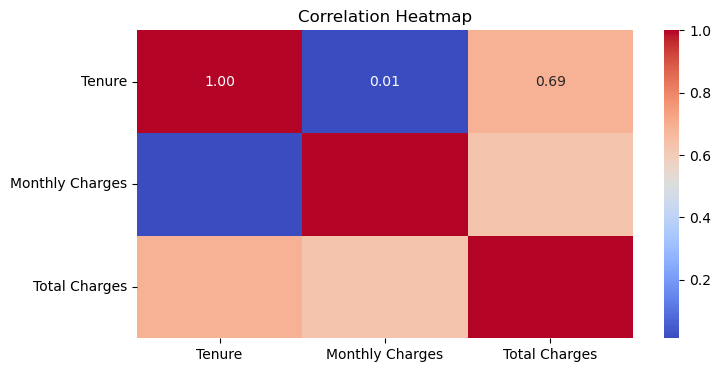

In [38]:
# correlation matrix - heatmap
plt.figure(figsize=(8,4))
sns.heatmap(df[["Tenure","Monthly Charges","Total Charges"]].corr(),annot=True, cmap="coolwarm",fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [39]:
df.columns

Index(['Age', 'Gender', 'Contract Type', 'Tenure', 'Monthly Charges',
       'Total Charges', 'Tech Support', 'Internet Service',
       'Paperless Billing', 'Payment Method', 'Churn'],
      dtype='object')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                5000 non-null   int64  
 1   Gender             5000 non-null   object 
 2   Contract Type      5000 non-null   object 
 3   Tenure             5000 non-null   int64  
 4   Monthly Charges    5000 non-null   float64
 5   Total Charges      5000 non-null   float64
 6   Tech Support       5000 non-null   object 
 7   Internet Service   4497 non-null   object 
 8   Paperless Billing  5000 non-null   object 
 9   Payment Method     5000 non-null   object 
 10  Churn              5000 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 429.8+ KB


In [41]:
object_cols = df.select_dtypes(include="object").columns.to_list()

In [42]:
object_cols

['Gender',
 'Contract Type',
 'Tech Support',
 'Internet Service',
 'Paperless Billing',
 'Payment Method',
 'Churn']

In [43]:
# Data Preprocessing :-
df.head(5)

,Age,Gender,Contract Type,Tenure,Monthly Charges,Total Charges,Tech Support,Internet Service,Paperless Billing,Payment Method,Churn
0,56,Female,One Year,45,127.93,5379.40,Yes,Fiber Optic,Yes,Mailed Check,No
1,69,Female,Month-to-Month,55,25.05,1284.65,Yes,Fiber Optic,No,Electronic Check,No
2,46,Female,Two Years,59,104.50,6223.68,No,Fiber Optic,Yes,Bank Transfer,No
3,32,Female,One Year,5,142.65,735.99,Yes,DSL,No,Electronic Check,No
4,60,Female,Month-to-Month,32,120.97,4228.65,No,Fiber Optic,Yes,Mailed Check,No


In [44]:
# Label encoding of the target column

In [45]:
df["Churn"] = df["Churn"].replace({"Yes":1, "No":0})

In [46]:
df.head(5)

,Age,Gender,Contract Type,Tenure,Monthly Charges,Total Charges,Tech Support,Internet Service,Paperless Billing,Payment Method,Churn
0,56,Female,One Year,45,127.93,5379.40,Yes,Fiber Optic,Yes,Mailed Check,0
1,69,Female,Month-to-Month,55,25.05,1284.65,Yes,Fiber Optic,No,Electronic Check,0
2,46,Female,Two Years,59,104.50,6223.68,No,Fiber Optic,Yes,Bank Transfer,0
3,32,Female,One Year,5,142.65,735.99,Yes,DSL,No,Electronic Check,0
4,60,Female,Month-to-Month,32,120.97,4228.65,No,Fiber Optic,Yes,Mailed Check,0


In [47]:
print(df["Churn"].value_counts())

Churn
0    3783
1    1217
Name: count, dtype: int64


In [48]:
# Label encoding of categorical features

In [49]:
# identifying columns with object data type
object_columns = df.select_dtypes(include="object").columns

In [50]:
print(object_columns)

Index(['Gender', 'Contract Type', 'Tech Support', 'Internet Service',
       'Paperless Billing', 'Payment Method'],
      dtype='object')


In [52]:
encoders

{'Gender': LabelEncoder(),
 'Contract Type': LabelEncoder(),
 'Tech Support': LabelEncoder(),
 'Internet Service': LabelEncoder(),
 'Paperless Billing': LabelEncoder(),
 'Payment Method': LabelEncoder()}

In [53]:
df.head()

,Age,Gender,Contract Type,Tenure,Monthly Charges,Total Charges,Tech Support,Internet Service,Paperless Billing,Payment Method,Churn
0,56,0,1,45,127.93,5379.40,1,1,1,3,0
1,69,0,0,55,25.05,1284.65,1,1,0,2,0
2,46,0,2,59,104.50,6223.68,0,1,1,0,0
3,32,0,1,5,142.65,735.99,1,0,0,2,0
4,60,0,0,32,120.97,4228.65,0,1,1,3,0


In [54]:
# Training and Testing data split

In [55]:
x = df.drop(columns=["Churn"])
y = df["Churn"]

In [56]:
print(x)

      Age  Gender  Contract Type  Tenure  Monthly Charges  Total Charges  \
0      56       0              1      45           127.93        5379.40   
1      69       0              0      55            25.05        1284.65   
2      46       0              2      59           104.50        6223.68   
3      32       0              1       5           142.65         735.99   
4      60       0              0      32           120.97        4228.65   
...   ...     ...            ...     ...              ...            ...   
4995   18       1              0      15           137.08        2048.74   
4996   32       1              0      17           122.78        2003.27   
4997   54       1              0      34            62.97        2239.60   
4998   30       1              0      35           140.74        5187.95   
4999   57       0              1      39           129.82        5382.42   

      Tech Support  Internet Service  Paperless Billing  Payment Method  
0            

In [57]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    1
4998    0
4999    0
Name: Churn, Length: 5000, dtype: int64


In [58]:
# split training and test data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [59]:
print(y_train.shape)

(4000,)


In [60]:
print(y_train.value_counts())

Churn
0    3010
1     990
Name: count, dtype: int64


In [61]:
# Synthetic Minority Oversampling TEchnique(SMOTE)


In [62]:
smote = SMOTE(random_state=42)

In [63]:
x_train_smote,y_train_smote = smote.fit_resample(x_train,y_train)

In [64]:
print(y_train_smote.shape)

(6020,)


In [65]:
print(y_train_smote.value_counts())

Churn
0    3010
1    3010
Name: count, dtype: int64


In [66]:
# Model Training

In [67]:
# Training with default hyperparameters

In [5]:
# dictionary of models
models = {
    "LogisticRegression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest":RandomForestClassifier(random_state=42),
    "XGBRFBoost": XGBRFClassifier(random_state=42)                                      
   }

In [121]:
cv_scores

{'LogisticRegression': array([0.50498339, 0.55232558, 0.68438538, 0.71096346, 0.70016611]),
 'Decision Tree': array([0.56229236, 0.59468439, 0.70265781, 0.68106312, 0.66362126]),
 'Random Forest': array([0.58388704, 0.63953488, 0.78986711, 0.8089701 , 0.79651163])}

In [122]:
# Random Forest gives the highest accuracy compared to other models with default parameters

In [123]:
rfc = RandomForestClassifier(random_state=42)

In [126]:
model.fit(x_train_smote,y_train_smote)

RandomForestClassifier(random_state=42)

In [128]:
print(y_test.value_counts())

Churn
0    773
1    227
Name: count, dtype: int64


In [127]:
# Model Evaluation

In [129]:
# Evaluate on test data
y_test_pred = model.predict(x_test)

print("Accuracy Score:\n", accuracy_score(y_test,y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test,y_test_pred))
print("Classification Report:\n", classification_report(y_test,y_test_pred))

Accuracy Score:
 0.645
Confusion Matrix:
 [[571 202]
 [153  74]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.74      0.76       773
           1       0.27      0.33      0.29       227

    accuracy                           0.65      1000
   macro avg       0.53      0.53      0.53      1000
weighted avg       0.67      0.65      0.66      1000



In [96]:
log = LogisticRegression()

In [97]:
log.fit(x_train,y_train)

LogisticRegression()

In [98]:
y_pred = log.predict(x_test)

In [99]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [100]:
y_test

1501    1
2586    0
2653    0
1055    0
705     0
       ..
4711    0
2313    0
3214    0
2732    1
1926    0
Name: Churn, Length: 1000, dtype: int64

In [103]:
accuracy_score(y_test,y_pred)*100

77.3

In [104]:
confusion_matrix(y_test,y_pred)

array([[773,   0],
       [227,   0]], dtype=int64)

In [105]:
classifier = DecisionTreeClassifier()

In [106]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [107]:
y_pred = classifier.predict(x_test)

In [108]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [109]:
# model evaluation


In [110]:
print(accuracy_score(y_test,y_pred)*100)


62.5


In [111]:
confusion_matrix(y_test,y_pred)

array([[557, 216],
       [159,  68]], dtype=int64)

In [112]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.78      0.72      0.75       773\n           1       0.24      0.30      0.27       227\n\n    accuracy                           0.62      1000\n   macro avg       0.51      0.51      0.51      1000\nweighted avg       0.66      0.62      0.64      1000\n'

In [113]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75       773
           1       0.24      0.30      0.27       227

    accuracy                           0.62      1000
   macro avg       0.51      0.51      0.51      1000
weighted avg       0.66      0.62      0.64      1000



In [114]:
rfc = RandomForestClassifier(n_estimators=400)

In [115]:
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=400)

In [117]:
rfc_pred = rfc.predict(x_test)

In [118]:
print(accuracy_score(y_test,rfc_pred))

0.762


In [119]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[557 216]
 [159  68]]
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       773
           1       0.24      0.30      0.27       227

    accuracy                           0.62      1000
   macro avg       0.51      0.51      0.51      1000
weighted avg       0.66      0.62      0.64      1000

